<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [86]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [87]:
import warnings 
warnings.filterwarnings('ignore')

In [170]:
# import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import plotly.express as px


from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [89]:
cars = pd.read_csv('Car details v3.csv', sep=',')

cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


## **Brief Desription about the data**

We found this data from kaggle, it is a dataset containing information about cars (Used plus new). The idea behind the data set is to be able to predict the car selling price.

Following are the features in the data set and a few description about the data

*  name : categorial feature; Name of the cars ex. Maruti Suzuki, Hyundai Verna etc.
*  year : categorical feature; Year when the car was last bought
*  selling_price : continuous feature; Price at which the car is offered to be sold, this is the predictor variable
*  km_driven : continuous feature; Number of kilometers the car has been driven
*  fuel : categorical feature; Fuel type of the car ex. Petrol, diesel, cng, lpg, electric
*  seller_type : categorical feature; Describes if the seller is an individual or a dealership
*  transmission : categorical feature; Gear trasmission of the car automatic or Manual
*  Owner  : categorical feature; tells if the owner is the first owner or second etc.
*  mileage  : mileage of the car
*  engine  : Engine of the car
*  max power : Max power
*  torque  : 
*  seats  : 4,5 etc

# 1.1. **Handling the Missing Values**


Text(0.5, 1.0, 'Total Missing Values')

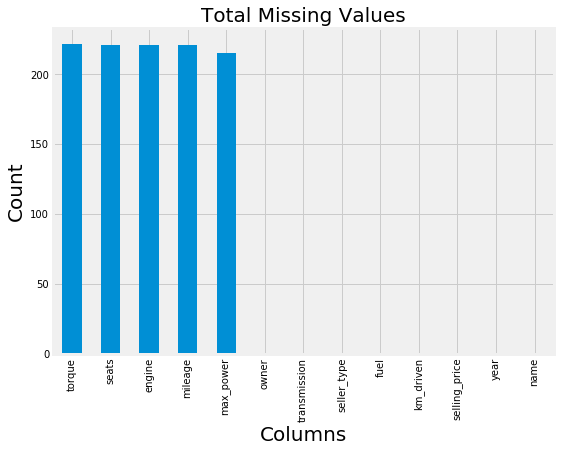

In [90]:
total = cars.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

as we had already seen some missing values are in torque, seats, mileage, max_power, engine

In [91]:
cars2 = cars.copy()

In [92]:
def null_percentage(df):
    # get the total number of rows in the dataframe
    total_rows = len(df)

    # calculate the percentage of null values in each column
    null_percentages = df.isnull().sum() / total_rows * 100

    return null_percentages
null_percent = null_percentage(cars)

print(null_percent)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


there is less than 2 percent null in 5 of these columns, since the null percentage is so low we can drop the null rows

In [93]:
cars = cars.dropna()

In [94]:
## dropped 222 records

# 1.2. Handling Outliers

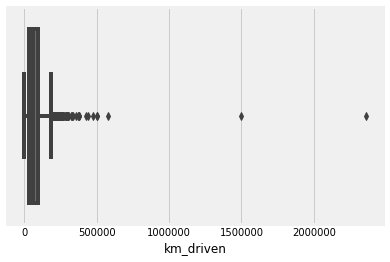

In [95]:
sns.boxplot(x=cars['km_driven'])

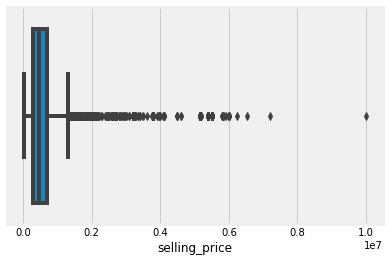

In [96]:
sns.boxplot(x=cars['selling_price'])

### Bivariate analysis

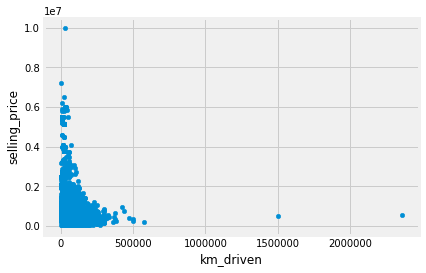

In [97]:
price_km = cars.plot.scatter(x='km_driven',
                      y='selling_price')

In [98]:
cars.sort_values(by = 'km_driven', ascending = False)[:2]['km_driven']
cars = cars.drop(cars.index[[1810,3486]])

In [99]:
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars.drop(cars[cars['km_driven'] == 1500000].index)

# print(df)
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars.drop(cars[cars['km_driven'] == 1500000].index)

# print(df)

# drop rows where the 'Name' column matches 'John'
cars_dropped = cars_dropped.drop(cars_dropped[cars_dropped['selling_price'] >= 6223000].index)

# print(df)

# drop rows where the 'Name' column matches 'John'
cars_dropped = cars_dropped.drop(cars_dropped[cars_dropped['km_driven'] >= 380000].index)

# print(df)

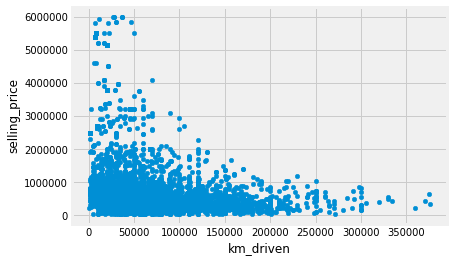

In [100]:
price_km_new = cars_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

In [101]:
cars = cars_dropped

# 1.3. EDA and Feature Engineering

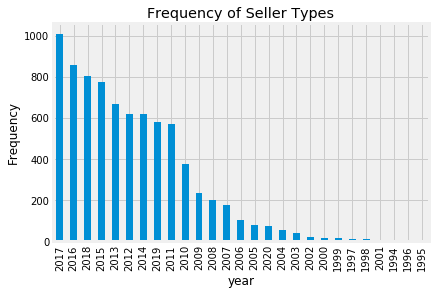

In [102]:
# Create a frequency table of the "seller_Type" column
seller_freq = cars['year'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Seller Types')
plt.xlabel('year')
plt.ylabel('Frequency')

# Display the plot
plt.show()

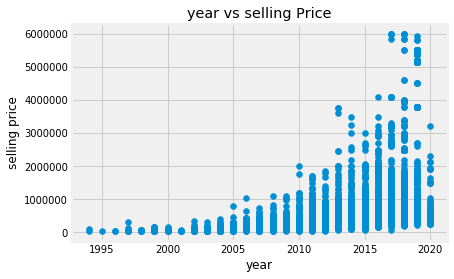

In [103]:
ax = plt.axes()

ax.scatter(cars.year, cars.selling_price)

# Label the axes
ax.set(xlabel='year',
       ylabel='selling price',
       title='year vs selling Price');
### END SOLUTION

### most of the data is between 2015 and 2020, similarly prices are higher for the cars in the last 5 years
lets split years into two categories last 5 years, 5 years or older

In [104]:
# convert years column to datetime
cars['year'] = pd.to_datetime(cars['year'], format='%Y')

# get maximum year in data
current_year = max(cars['year']).year

# create mask for last 5 years
last_5_years_mask = (cars['year'] > pd.to_datetime(f'{current_year - 5}', format='%Y'))

# create new column with categories
cars['Year Category'] = pd.np.where(last_5_years_mask, 'Last 5 Years', '5 Years or Older')

# display data
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Year Category
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,5 Years or Older
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,5 Years or Older
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,5 Years or Older
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,5 Years or Older
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,5 Years or Older


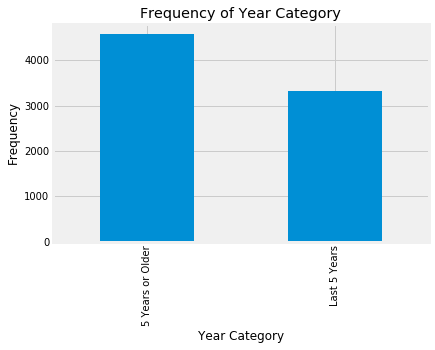

In [105]:
# Create a frequency table of the "seller_Type" column
seller_freq = cars['Year Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Fuel Type

fuel
CNG       317903.788462
Diesel    801393.651515
LPG       210885.714286
Petrol    466722.116107
Name: selling_price, dtype: float64


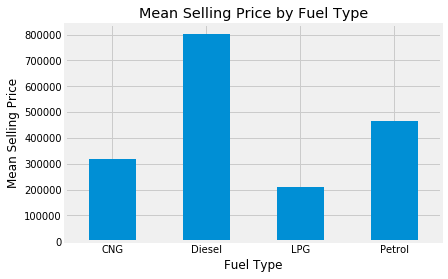

Diesel    4290
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64


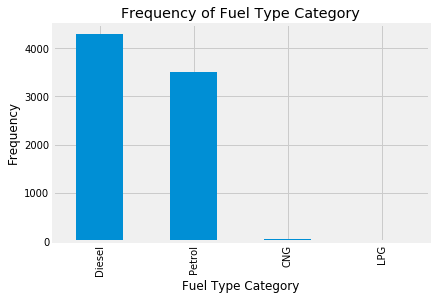

In [106]:
# Create a figure with two subplots side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# group by fuel type and calculate mean selling price
mean_sell_price = (cars.groupby('fuel')['selling_price'].mean())
print(mean_sell_price)

# create histogram plot
mean_sell_price.plot(kind='bar', rot=0)
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Fuel Type')

# display plot
plt.show()

# Plot on the second subplot
# Create a frequency table of the "seller_Type" column
seller_freq = cars['fuel'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')
print(seller_freq)
# Set the plot title and axis labels
plt.title('Frequency of Fuel Type Category')
plt.xlabel('Fuel Type Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()








## Reduce the categories from Diesel Petrol CNG LPG to OIL and Gas

fuel_new
gas    274850.540230
oil    650697.114428
Name: selling_price, dtype: float64


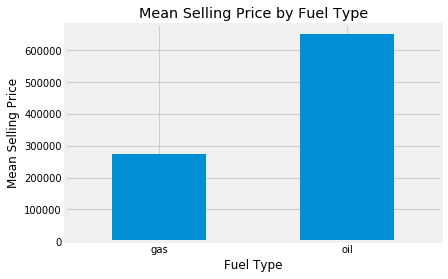

In [107]:
# Create a copy of the original column
cars['fuel_new'] = cars['fuel'].copy()

# Replace Diesel and Petrol with 'oil'
cars['fuel_new'] = cars['fuel_new'].replace(['Diesel', 'Petrol'], 'oil')

# Replace CNG and LPG with 'gas'
cars['fuel_new'] = cars['fuel_new'].replace(['CNG', 'LPG'], 'gas')

# group by fuel type and calculate mean selling price
mean_sell_price = cars.groupby('fuel_new')['selling_price'].mean()

# display results
print(mean_sell_price)

# create histogram plot
mean_sell_price.plot(kind='bar', rot=0)
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Fuel Type')

# display plot
plt.show()

## Seller Type

seller_type
Dealer              1.451017e+06
Individual          5.053075e+05
Trustmark Dealer    8.013149e+05
Name: selling_price, dtype: float64


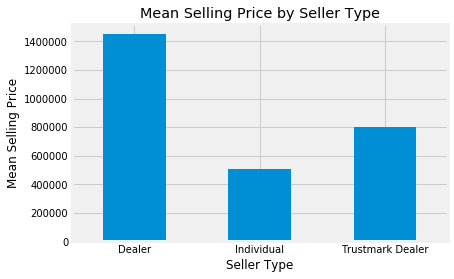

In [108]:
# group by fuel type and calculate mean selling price
mean_sell_type = cars.groupby('seller_type')['selling_price'].mean()

# display results
print(mean_sell_type)


# create histogram plot
mean_sell_type.plot(kind='bar', rot=0)
plt.xlabel('Seller Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Seller Type')

# display plot
plt.show()

## TrustMark dealer is another type of Dealer it self, we can rename it as Dealer and rename Individual Seller Type as Individual

In [109]:
# replace "Trustmark Dealer" with "Dealer"
cars['seller_type'] = cars['seller_type'].replace('Trustmark Dealer', 'Dealer')
cars['seller_type'] = cars['seller_type'].replace('Individual Seller Type', 'Individual')

seller_type
Dealer        1.337077e+06
Individual    5.053075e+05
Name: selling_price, dtype: float64


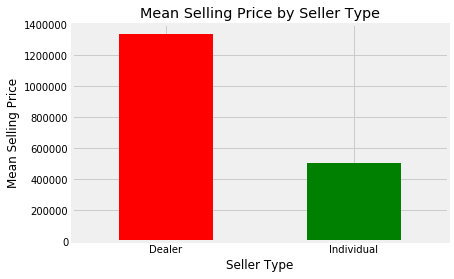

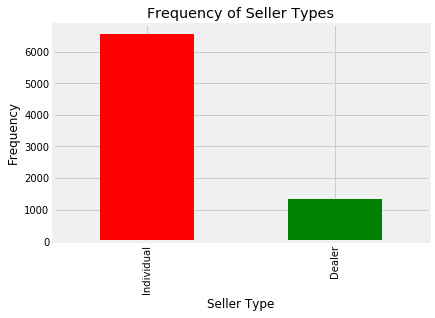

In [110]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
# group by fuel type and calculate mean selling price
mean_sell_type = cars.groupby('seller_type')['selling_price'].mean()

# display results
print(mean_sell_type)


# create histogram plot
mean_sell_type.plot(kind='bar', rot=0, color=colors)
plt.xlabel('Seller Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Seller Type')

# display plot
plt.show()


# Create a frequency table of the "seller_Type" column
seller_freq = cars['seller_type'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar', color=colors)

# Set the plot title and axis labels
plt.title('Frequency of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Owner

owner
First Owner             7.870513e+05
Fourth & Above Owner    2.331968e+05
Second Owner            4.012399e+05
Test Drive Car          3.091000e+06
Third Owner             2.929774e+05
Name: selling_price, dtype: float64


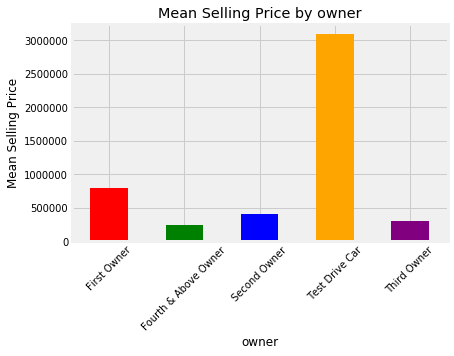

In [111]:
# group by fuel type and calculate mean selling price
mean_sell_owner = cars.groupby('owner')['selling_price'].mean()

# display results
print(mean_sell_owner)


# create histogram plot
mean_sell_owner.plot(kind='bar', rot=0, color=colors)
plt.xlabel('owner')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by owner')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

it seems test drive cars has the most price over other owned cars, also we can rename secong third fouth and above owners as one_plus_owners

In [112]:
# Create a copy of the original column
cars['owner_new'] = cars['owner'].copy()

# Replace Second, third and Fourth and above owner by more than 1 owner'
cars['owner_new'] = cars['owner_new'].replace(['Second Owner', 'Third Owner', 'Fourth & Above Owner'], 'One plus owner')


## Seats

5.0     6246
7.0     1114
8.0      235
4.0      132
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64


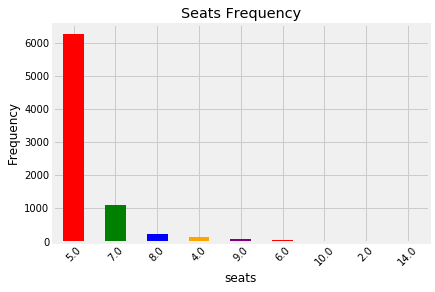

In [113]:
# group by fuel type and calculate mean selling price
seats_freq = cars.seats.value_counts()

# display results
print(seats_freq)


# create histogram plot
seats_freq.plot(kind='bar', rot=0, color=colors)
plt.xlabel('seats')
plt.ylabel('Frequency')
plt.title('Seats Frequency')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

We can see from the above plot most of the cars are 5 seaters, with some cars having seats in the range of 7,8,9,10
We can divide the categories into less than 5, 5 to 8 and greater than 8

In [114]:

categories = ['lt_5', '5_to_8','gt_8']

# define the bins for engine displacement categories
bins = [0, 5, 8, float('inf')]


# bucketize engine displacement into categories
cars['seats_Category'] = pd.cut(cars['seats'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['seats_Category'].value_counts())

lt_5      6380
5_to_8    1411
gt_8       100
Name: seats_Category, dtype: int64


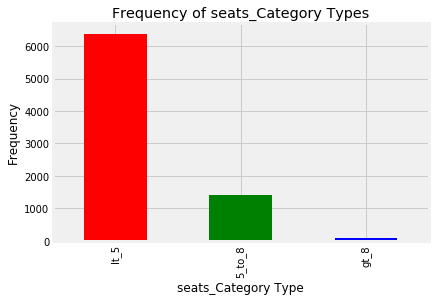

In [115]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['seats_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar', color=colors)

# Set the plot title and axis labels
plt.title('Frequency of seats_Category Types')
plt.xlabel('seats_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Engine

In [116]:
len(cars.engine.unique())

121

Looks like there are total 121 different categories of engine, we would need to make buckets,

lets make buckets of 1000cc, 1250 cc, 1500 cc, 2000 and more 

In [117]:
cars3 = cars.copy()

In [118]:

# convert Engine column to integer type
cars['engine_num'] = cars['engine'].str.extract('(\d+)').astype(int)

categories = ['lt_1000', '1000_to_1250', '1250_to_1500', '1500_to_2000', 'gt_2000']

# define the bins for engine displacement categories
bins = [0, 1000, 1250, 1500, 2000, float('inf')]


# bucketize engine displacement into categories
cars['Engine_Category'] = pd.cut(cars['engine_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['Engine_Category'].value_counts())

1000_to_1250    2800
1250_to_1500    1726
lt_1000         1311
gt_2000         1206
1500_to_2000     848
Name: Engine_Category, dtype: int64


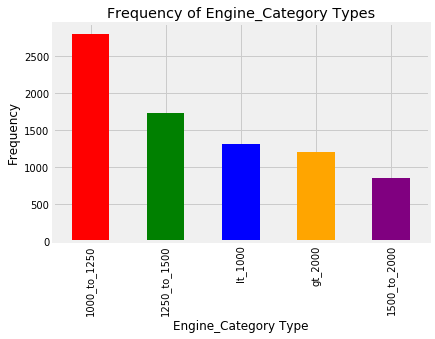

In [119]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['Engine_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar', color=colors)

# Set the plot title and axis labels
plt.title('Frequency of Engine_Category Types')
plt.xlabel('Engine_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## max_power

In [120]:

# convert Engine column to integer type
cars['max_power_num'] = cars['max_power'].str.extract('(\d+)').astype(int)

categories = ['lt_50', '50_to_100', '100_to_150', '150_to_200', 'gt_200']

# define the bins for engine displacement categories
bins = [0, 50, 100, 150, 200, float('inf')]


# bucketize engine displacement into categories
cars['mp_Category'] = pd.cut(cars['max_power_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['mp_Category'].value_counts())

50_to_100     5387
100_to_150    1452
150_to_200     487
lt_50          477
gt_200          88
Name: mp_Category, dtype: int64


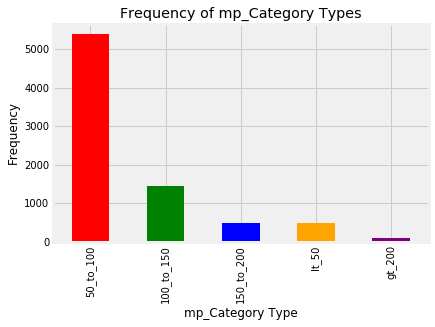

In [121]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['mp_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar', color=colors)

# Set the plot title and axis labels
plt.title('Frequency of mp_Category Types')
plt.xlabel('mp_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Mileage

In [122]:
# convert Engine column to integer type
cars['mileage_num'] = cars['mileage'].str.extract('(\d+)').astype(int)

categories = ['lt_15', '15_to_20', '20_to_25', '25_to_30', 'gt_30']

# define the bins for engine displacement categories
bins = [-1, 15, 20, 25, 30, float('inf')]


# bucketize engine displacement into categories
cars['mileage_Category'] = pd.cut(cars['mileage_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['mileage_Category'].value_counts())

15_to_20    3580
20_to_25    2399
lt_15       1537
25_to_30     369
gt_30          6
Name: mileage_Category, dtype: int64


## getting the car company name from the car name column

In [123]:
# split the 'Name' column into 'First_Name' and 'Last_Name'
cars['company_name'] = cars['name'].str.split(' ', expand=True)[0]

price_bycompany = cars.groupby(['year', 'company_name'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

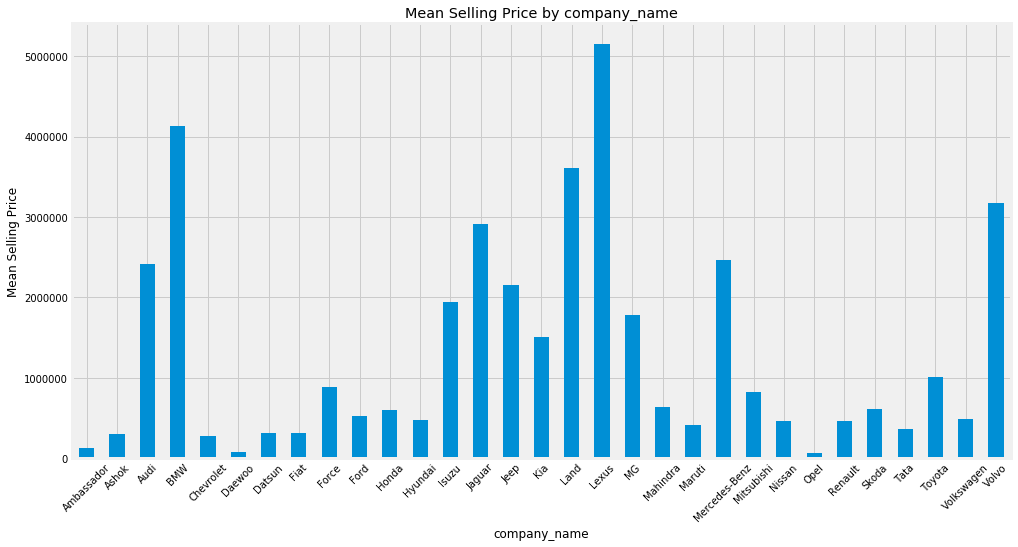

In [124]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('company_name')['selling_price'].mean()

# display results
# print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0)
plt.xlabel('company_name')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by company_name')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

In [125]:
fig = plt.figure(figsize=(15,15))
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "company_name", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [126]:
##let's look at some selected companies
cars_filtered = cars.loc[cars['company_name'].isin(['Honda', 'Ambassador', 'Toyota', 'Tata', 'Audi', 'Mercedes-Benz'])]
# cars_filtered = cars.loc[cars['company_name'].isin(['Tata'])]
price_bycompany_flt = cars_filtered.groupby(['year', 'company_name'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

fig = px.line(price_bycompany_flt
                   ,x='year', y = "selling_price", 
                   color = "company_name", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

## Some examples of variation of prices for companies over the years - 
* Ambassador cars Prices Didnt Rise much and also We donot have many ambassadors after 2008
* Honda cars prices have seen a steady rise since 2005 with recenly in 2020 we are seeing a sharp rise from 2019
* Toyota cars started showing up more from 2002 and currently in 2020 we have toyota cars of the range of 20 million

Since the number of different car company names are too many to learn from, lets create some more categories from the company names,

* company country - this column tells us about the country from which the car company belong to
* company_class_type - This column tells us to which type of class the company cars belong too, for example, economic, premium, luxury etc

In [127]:
# create a dictionary with car companies and their countries
country_dict = {'Maruti': 'India',
                'Skoda': 'Czech Republic',
                'Honda': 'Japan',
                'Hyundai': 'South Korea',
                'Toyota': 'Japan',
                'Ford': 'United States',
                'Renault': 'France',
                'Mahindra': 'India',
                'Tata': 'India',
                'Chevrolet': 'United States',
                'Datsun': 'Japan',
                'Jeep': 'United States',
                'Mercedes-Benz': 'Germany',
                'Mitsubishi': 'Japan',
                'Audi': 'Germany',
                'Volkswagen': 'Germany',
                'BMW': 'Germany',
                'Nissan': 'Japan',
                'Lexus': 'Japan',
                'Jaguar': 'United Kingdom',
                'Land': 'United Kingdom',
                'MG': 'United Kingdom',
                'Volvo': 'Sweden',
                'Daewoo': 'South Korea',
                'Kia': 'South Korea',
                'Fiat': 'Italy',
                'Force': 'India',
                'Ambassador': 'India',
                'Ashok': 'India',
                'Isuzu': 'Japan',
                'Opel': 'Germany'}


# create a dictionary with car companies and their classes
class_dict = {'Maruti': 'Economy',
              'Skoda': 'Premium',
              'Honda': 'Economy',
              'Hyundai': 'Economy',
              'Toyota': 'Premium',
              'Ford': 'Economy',
              'Renault': 'Economy',
              'Mahindra': 'Economy',
              'Tata': 'Economy',
              'Chevrolet': 'Economy',
              'Datsun': 'Economy',
              'Jeep': 'Premium',
              'Mercedes-Benz': 'Luxury',
              'Mitsubishi': 'Economy',
              'Audi': 'Luxury',
              'Volkswagen': 'Economy',
              'BMW': 'Luxury',
              'Nissan': 'Economy',
              'Lexus': 'Luxury',
              'Jaguar': 'Luxury',
              'Land': 'Luxury',
              'MG': 'Economy',
              'Volvo': 'Luxury',
              'Daewoo': 'Economy',
              'Kia': 'Economy',
              'Fiat': 'Economy',
              'Force': 'Economy',
              'Ambassador': 'Economy',
              'Ashok': 'Economy',
              'Isuzu': 'Economy',
              'Opel': 'Economy'}

# create new columns for country of origin and class of car companies
cars['country'] = cars['company_name'].map(country_dict)
cars['class'] = cars['company_name'].map(class_dict)

# display the resulting dataframe
print(cars)

                                              name       year  selling_price  \
0                           Maruti Swift Dzire VDI 2014-01-01         450000   
1                     Skoda Rapid 1.5 TDI Ambition 2014-01-01         370000   
2                         Honda City 2017-2020 EXi 2006-01-01         158000   
3                        Hyundai i20 Sportz Diesel 2010-01-01         225000   
4                           Maruti Swift VXI BSIII 2007-01-01         130000   
5                    Hyundai Xcent 1.2 VTVT E Plus 2017-01-01         440000   
6                     Maruti Wagon R LXI DUO BSIII 2007-01-01          96000   
7                               Maruti 800 DX BSII 2001-01-01          45000   
8                                 Toyota Etios VXD 2011-01-01         350000   
9             Ford Figo Diesel Celebration Edition 2013-01-01         200000   
10                 Renault Duster 110PS Diesel RxL 2014-01-01         500000   
11                                   Mar

class
Economy    4.617102e+05
Luxury     3.422459e+06
Premium    1.002375e+06
Name: selling_price, dtype: float64


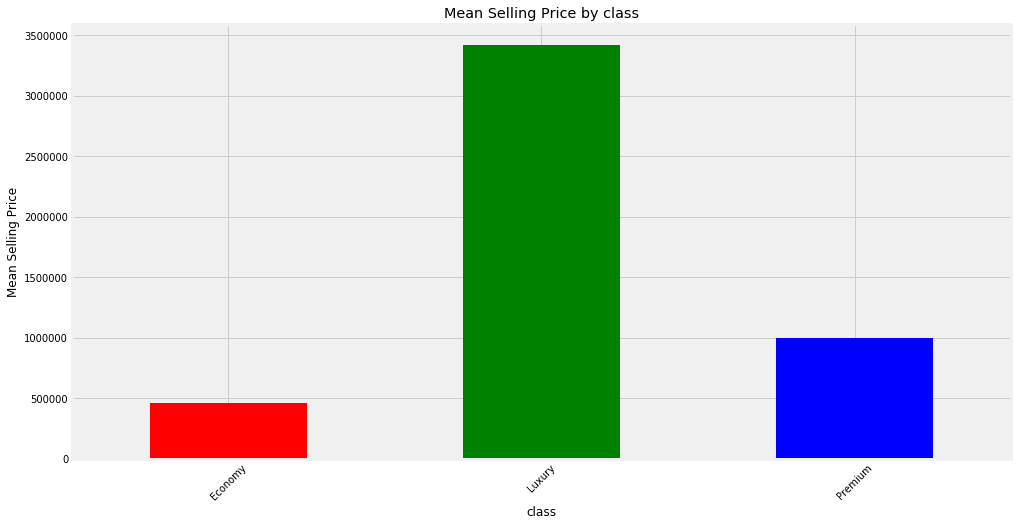

In [128]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('class')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0, color = colors)
plt.xlabel('class')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by class')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

country
Czech Republic    6.097211e+05
France            4.626184e+05
Germany           2.022263e+06
India             4.441336e+05
Italy             3.171951e+05
Japan             8.868089e+05
South Korea       4.754142e+05
Sweden            3.170076e+06
United Kingdom    2.924975e+06
United States     5.111348e+05
Name: selling_price, dtype: float64


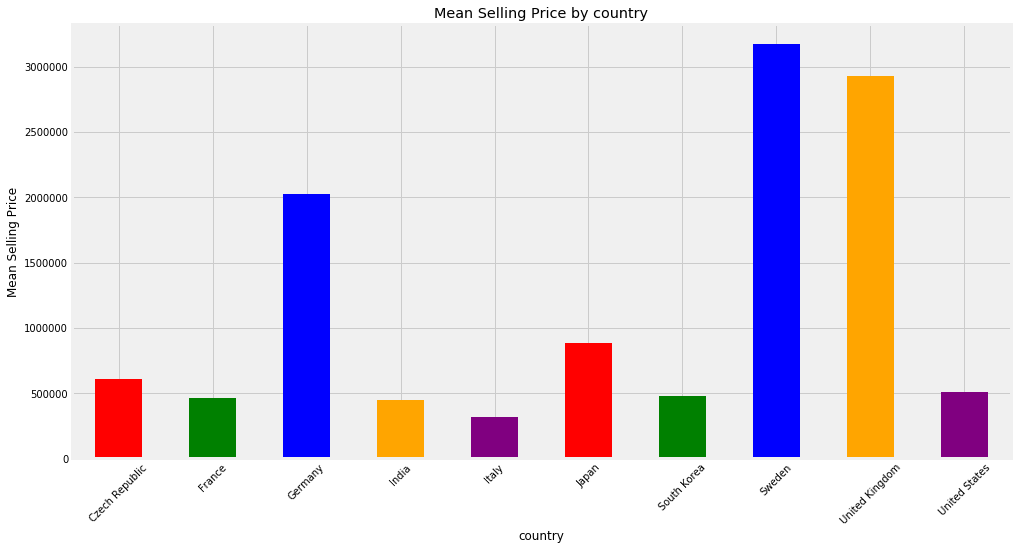

In [129]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('country')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0,color = colors)
plt.xlabel('country')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by country')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

In [130]:
price_bycompany = cars.groupby(['year', 'class'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "class", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

luxury cars are from the range of 2005 and is always costlier followed by premium followed by Economy

In [131]:
price_bycompany = cars.groupby(['year', 'seller_type'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "seller_type", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

Selling Price of cars by Delaership started showing up from around 2002 and was in similar line as that of Individual sellers but we saw a huge spike from around 2015, with the onset of many new esteemed dealership

In [132]:
price_bycompany = cars.groupby(['year', 'fuel'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "fuel", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

Diesel car prices have always been a slightly higher than Petrol car prices with recently the price difference from 2012 there is a significant difference

## Gas consumed by the car

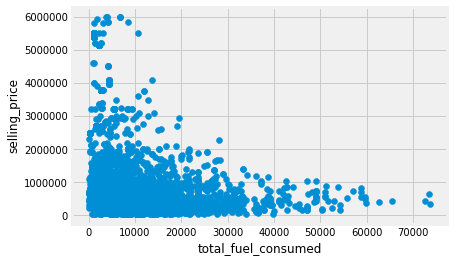

In [133]:
# convert mileage to liters per 100 km
cars['fuel_consumption'] = 235.215 / cars['mileage_num']

# calculate total fuel consumed
cars['total_fuel_consumed'] = (cars['fuel_consumption'] / 100) * cars['km_driven']


plt.scatter(cars['total_fuel_consumed'], cars['selling_price'])
plt.xlabel('total_fuel_consumed')
plt.ylabel('selling_price')
plt.show()

# 1.4. Feature Transformation

Skewness: 4.044649


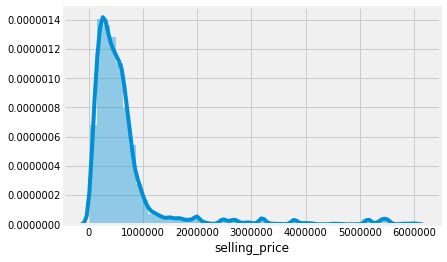

In [134]:
sp_untransformed = sns.distplot(cars['selling_price'])

print("Skewness: %f" % cars['selling_price'].skew())

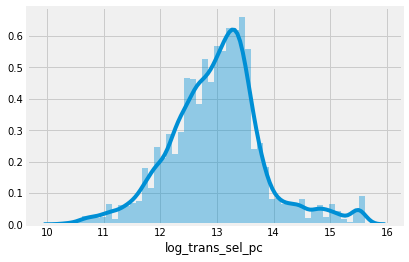

In [135]:
cars['log_trans_sel_pc'] = np.log(cars['selling_price'])

sp_lgtransformed = sns.distplot(cars['log_trans_sel_pc'])

Skewness: 1.288884


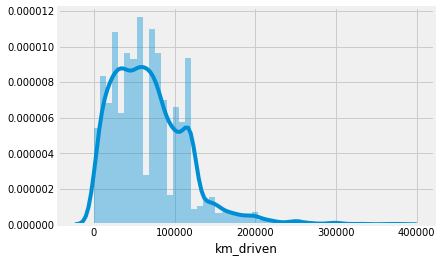

In [136]:
km_untransformed = sns.distplot(cars['km_driven'])
print("Skewness: %f" % cars['km_driven'].skew()) ## higly positively skewed

Skewness: -0.035901


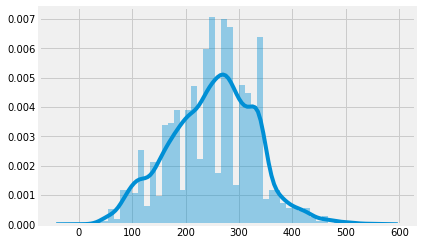

In [137]:
bxcx_transformed_km = stats.boxcox(cars['km_driven'])[0]
km_transformed_bxcx = sns.distplot(bxcx_transformed_km)
print("Skewness: %f" % pd.Series(bxcx_transformed_km).skew()) ## log transformation reduced the skewness
cars['bxcx_trans_km_driven'] = stats.boxcox(cars['km_driven'])[0]

## Dropping columns, that we wont be using

In [138]:
# calculate the correlation between all variables
corr_matrix = cars.corr()

# print the correlation matrix
display(corr_matrix)

,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num,fuel_consumption,total_fuel_consumed,log_trans_sel_pc,bxcx_trans_km_driven
selling_price,1.000000,-0.268776,0.043771,0.459692,0.747223,-0.133779,0.149697,-0.198836,0.800415,-0.322005
km_driven,-0.268776,1.000000,0.269623,0.243389,-0.046001,-0.200130,0.237549,0.930486,-0.303082,0.959272
seats,0.043771,0.269623,1.000000,0.610731,0.195216,-0.456424,0.537473,0.428824,0.189354,0.248967
engine_num,0.459692,0.243389,0.610731,1.000000,0.707702,-0.578612,0.667278,0.424169,0.517937,0.210622
max_power_num,0.747223,-0.046001,0.195216,0.707702,1.000000,-0.376388,0.423873,0.074280,0.729555,-0.077532
mileage_num,-0.133779,-0.200130,-0.456424,-0.578612,-0.376388,1.000000,-0.962416,-0.465130,-0.036015,-0.163701
fuel_consumption,0.149697,0.237549,0.537473,0.667278,0.423873,-0.962416,1.000000,0.516356,0.080952,0.200201
total_fuel_consumed,-0.198836,0.930486,0.428824,0.424169,0.074280,-0.465130,0.516356,1.000000,-0.232876,0.866201
log_trans_sel_pc,0.800415,-0.303082,0.189354,0.517937,0.729555,-0.036015,0.080952,-0.232876,1.000000,-0.353667
bxcx_trans_km_driven,-0.322005,0.959272,0.248967,0.210622,-0.077532,-0.163701,0.200201,0.866201,-0.353667,1.000000


In [139]:

# drop the columns named 'column_1' and 'column_2'
cars.drop(['year', 'name', 'km_driven', 'fuel', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'engine_num', 'max_power_num', 'mileage_num', 'mileage_Category', 'company_name', 'mileage_num', 'fuel_consumption'], axis=1, inplace=True)

In [140]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 14 columns):
selling_price           7891 non-null int64
seller_type             7891 non-null object
transmission            7891 non-null object
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
Engine_Category         7891 non-null category
mp_Category             7891 non-null category
country                 7891 non-null object
class                   7891 non-null object
total_fuel_consumed     7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
dtypes: category(3), float64(3), int64(1), object(7)
memory usage: 763.4+ KB


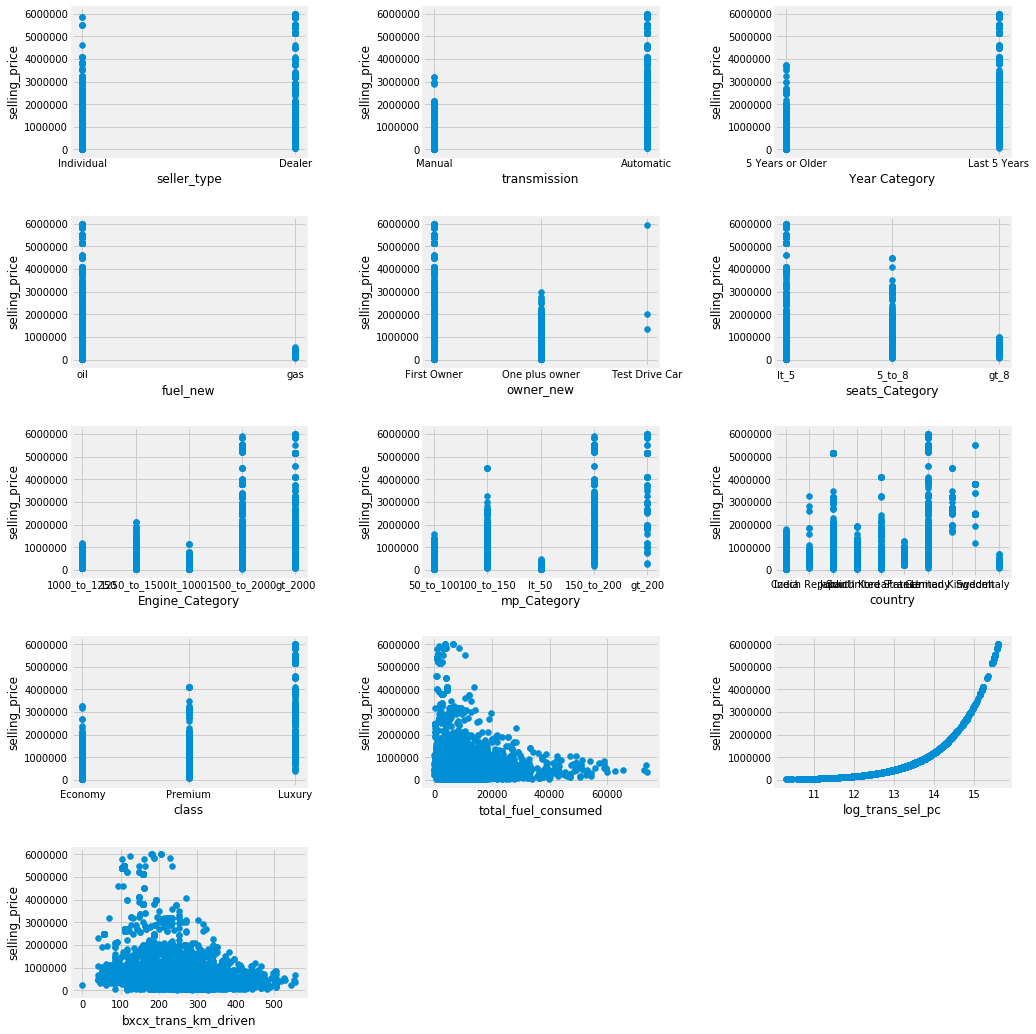

In [141]:
# select all variables except selling_price
features = list(cars.columns)
features.remove('selling_price')

# calculate the number of rows and columns needed for the plot
n_cols = 3
n_rows = len(features) // n_cols + 1

# create a new figure
fig = plt.figure(figsize=(15, 15))

# loop over all features and create scatter plots with selling_price
for i, feature in enumerate(features):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.scatter(cars[feature], cars['selling_price'])
    ax.set_xlabel(feature)
    ax.set_ylabel('selling_price')

# adjust the layout and padding of the figure
fig.tight_layout(pad=3.0)

# show the plot
plt.show()

## One hot encoding of Categorical columns

In [142]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 14 columns):
selling_price           7891 non-null int64
seller_type             7891 non-null object
transmission            7891 non-null object
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
Engine_Category         7891 non-null category
mp_Category             7891 non-null category
country                 7891 non-null object
class                   7891 non-null object
total_fuel_consumed     7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
dtypes: category(3), float64(3), int64(1), object(7)
memory usage: 763.4+ KB


In [143]:
# Convert the category dtype column to object dtype
cars['seats_Category'] = cars['seats_Category'].astype('object')
cars['Engine_Category'] = cars['Engine_Category'].astype('object')
cars['mp_Category'] = cars['mp_Category'].astype('object')

In [144]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 14 columns):
selling_price           7891 non-null int64
seller_type             7891 non-null object
transmission            7891 non-null object
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null object
Engine_Category         7891 non-null object
mp_Category             7891 non-null object
country                 7891 non-null object
class                   7891 non-null object
total_fuel_consumed     7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
dtypes: float64(3), int64(1), object(10)
memory usage: 924.7+ KB


In [145]:
# get a list of all categorical columns
cat_cols = list(cars.select_dtypes(include=['object']).columns)

cat_cols
# # perform one-hot encoding for all categorical columns
cars = pd.get_dummies(cars, columns=cat_cols)


In [146]:
corr_matrix = cars.corr()
corr_matrix['log_trans_sel_pc'].sort_values(ascending=False)

log_trans_sel_pc                  1.000000
selling_price                     0.800415
Year Category_Last 5 Years        0.533590
class_Luxury                      0.528834
transmission_Automatic            0.501211
mp_Category_150_to_200            0.487063
owner_new_First Owner             0.382398
seller_type_Dealer                0.365528
Engine_Category_1500_to_2000      0.307049
Engine_Category_gt_2000           0.278560
country_Germany                   0.273303
mp_Category_gt_200                0.258528
country_United Kingdom            0.229640
country_Sweden                    0.215587
class_Premium                     0.201602
seats_Category_5_to_8             0.201214
country_Japan                     0.189707
mp_Category_100_to_150            0.183430
fuel_new_oil                      0.071795
owner_new_Test Drive Car          0.041139
country_Czech Republic            0.015069
seats_Category_gt_8              -0.005809
country_France                   -0.008389
Engine_Cate

# 2. Objectives


In the data as we have discussed in the EDA and Feature engineering section that Selling Price is the Y variable that we want to predict

* Since Selling price was highly skewed, therefore we have utilized log transformation on the variable to reduce the skewness ina normal range. 
* We have also done a thorough EDA on most of the available features and perfomed feature engineering whereever necessary

Finally with the available transformed data set our main objective here would be to utilize a different kinds of linear regression model

* Ordinary Least Square
* Ridge regression
* LASSO regression

We would look into the overall performance of the model and determine the performnce using R2, also we will try to see if using cross validation improves the model performance

to be able to predict selling Price for any available car present in the data set

# 3. Linear Regression Models


## Before starting with Linear regression let us follow if the data satisfied the different conditions that are part of linear regression

In [147]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 41 columns):
selling_price                     7891 non-null int64
total_fuel_consumed               7891 non-null float64
log_trans_sel_pc                  7891 non-null float64
bxcx_trans_km_driven              7891 non-null float64
seller_type_Dealer                7891 non-null uint8
seller_type_Individual            7891 non-null uint8
transmission_Automatic            7891 non-null uint8
transmission_Manual               7891 non-null uint8
Year Category_5 Years or Older    7891 non-null uint8
Year Category_Last 5 Years        7891 non-null uint8
fuel_new_gas                      7891 non-null uint8
fuel_new_oil                      7891 non-null uint8
owner_new_First Owner             7891 non-null uint8
owner_new_One plus owner          7891 non-null uint8
owner_new_Test Drive Car          7891 non-null uint8
seats_Category_5_to_8             7891 non-null uint8
seats_Category_gt_8    

In [148]:
# cars.seats_Category.unique()

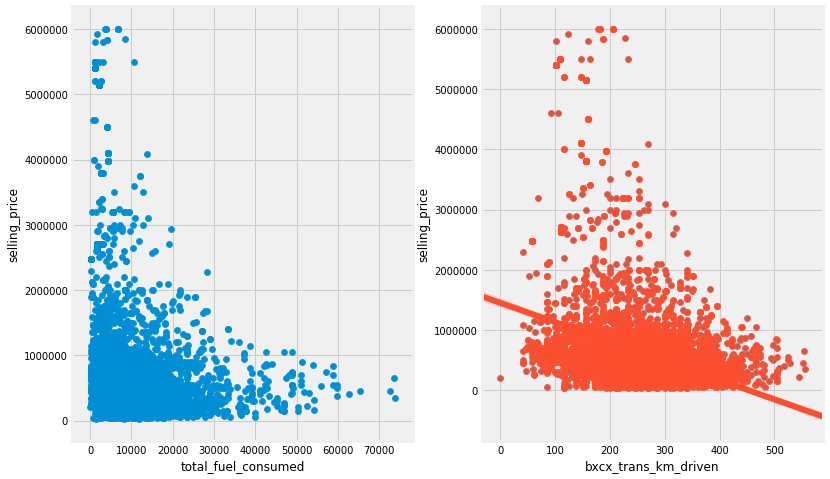

In [149]:
# 3.1. Linearity Assumtion
# Linear regression needs the relationship between independent variable and the dependent variable to be linear. 
# We can test this assumption with some scatter plots and regression lines.

fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = cars.total_fuel_consumed, y = cars.selling_price,  ax=ax1)
sns.regplot(x = cars.total_fuel_consumed, y = cars.selling_price,  ax=ax1)
 
sns.scatterplot(x = cars.bxcx_trans_km_driven, y = cars.selling_price,  ax=ax2)
sns.regplot(x = cars.bxcx_trans_km_driven, y = cars.selling_price,  ax=ax2);

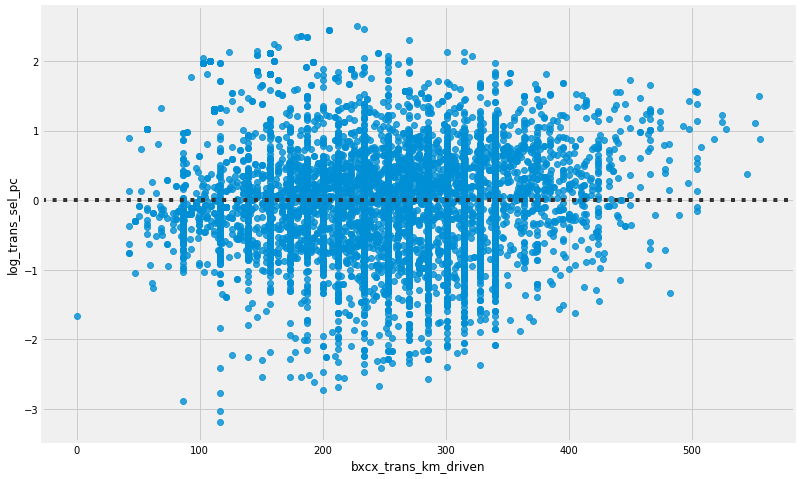

In [150]:
# 3.2. *Homoscedasticity*

#The assumption of *homoscedasticity* (constant variance), is crucial to linear regression models. 
# *Homoscedasticity* describes a situation in which the error term or variance or the "noise" or random disturbance 
# in the relationship between the independent variables and the dependent variable is the same across all values of the 
#independent variable. In other words, there is a constant variance present in the response variable as the predictor 
# variable increases. If the "noise" is not the same across the values of an independent variable, we call 
# it *heteroscedasticity*, opposite of *homoscedasticity*.


plt.subplots(figsize = (12,8))
sns.residplot(x = cars.bxcx_trans_km_driven, y = cars.log_trans_sel_pc)


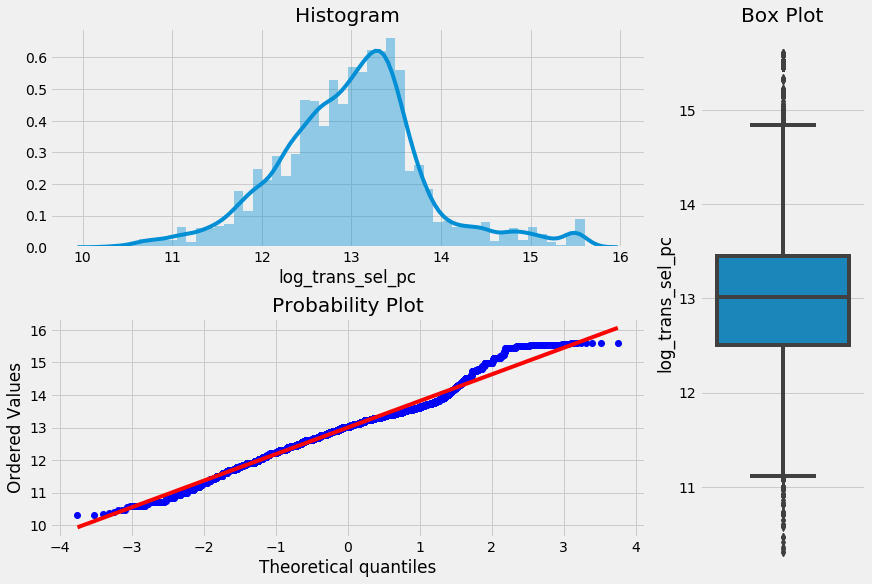

In [151]:
# 3.3. Normality

# The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) contains more information on the normality assumption.

# Let's display all three charts to show how our target variable, 'price' behaves.


def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(cars, 'log_trans_sel_pc')

In [152]:
# We can also check statistically if the target is normally distributed, using `normaltest()` function. If the p-value is large (>0.05), the target variable is normally distributed.

normaltest(cars.selling_price.values)

NormaltestResult(statistic=6554.29195820226, pvalue=0.0)

In [153]:
normaltest(np.log(cars.selling_price).values)

NormaltestResult(statistic=233.4301466102812, pvalue=2.0478008015032176e-51)

### dropping some final columns

In [154]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 41 columns):
selling_price                     7891 non-null int64
total_fuel_consumed               7891 non-null float64
log_trans_sel_pc                  7891 non-null float64
bxcx_trans_km_driven              7891 non-null float64
seller_type_Dealer                7891 non-null uint8
seller_type_Individual            7891 non-null uint8
transmission_Automatic            7891 non-null uint8
transmission_Manual               7891 non-null uint8
Year Category_5 Years or Older    7891 non-null uint8
Year Category_Last 5 Years        7891 non-null uint8
fuel_new_gas                      7891 non-null uint8
fuel_new_oil                      7891 non-null uint8
owner_new_First Owner             7891 non-null uint8
owner_new_One plus owner          7891 non-null uint8
owner_new_Test Drive Car          7891 non-null uint8
seats_Category_5_to_8             7891 non-null uint8
seats_Category_gt_8    

In [155]:
# cars = cars4

In [156]:
cars4 = cars.copy()

In [157]:
cars = cars.drop(["log_trans_sel_pc"], axis=1)
cars.head()

,selling_price,total_fuel_consumed,bxcx_trans_km_driven,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,Year Category_5 Years or Older,Year Category_Last 5 Years,fuel_new_gas,...,country_India,country_Italy,country_Japan,country_South Korea,country_Sweden,country_United Kingdom,country_United States,class_Economy,class_Luxury,class_Premium
0,450000,14879.905435,369.586777,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,370000,13440.857143,340.268666,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,158000,19370.647059,363.529514,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,225000,12987.958696,348.646705,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,130000,17641.125000,340.268666,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


**Create X and y**

**Create Polynomial Features**


In [158]:
cars.shape

(7891, 40)

In [159]:
# Check for NaN values in all columns
has_nan = cars.isnull().any().any()

# Check for infinity values in all columns
has_inf = np.isinf(cars.values).any()
has_inf

# Print the results
if has_nan:
    print("DataFrame contains NaN values")
else:
    print("DataFrame does not contain NaN values")

if has_inf:
    print("DataFrame contains infinity values")
else:
    print("DataFrame does not contain infinity values")

DataFrame does not contain NaN values
DataFrame contains infinity values


In [160]:
# Check for infinity values in columns
columns_with_inf = cars.columns[np.isinf(cars).any()]

# Print the columns with infinity values
if len(columns_with_inf) > 0:
    print("Columns with infinity values:", columns_with_inf)
else:
    print("No columns contain infinity values")

Columns with infinity values: Index(['total_fuel_consumed'], dtype='object')


In [161]:
cars5 = cars.copy()

In [162]:
# Remove rows with infinite values in column 'A'
cars = cars[np.isfinite(cars['total_fuel_consumed'])]

In [163]:
y_col = "selling_price"

X = cars.drop(y_col, axis=1)
y = cars[y_col]

In [164]:
pf = PolynomialFeatures(degree=2, include_bias=False) ## this is the bias term beta not
X_pf = pf.fit_transform(X)

In [165]:
X_pf.shape

(7874, 819)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)
s = StandardScaler()
X_train_s = s.fit_transform(X_train) ## this is scaling the data calculating the mean and sd and scaling the data


# Instructor Solution
bc_result2 = stats.boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

y_train_log = np.log(y_train)




In [213]:
model_dict = {}

In [167]:
lr_1 = LinearRegression()
lr_1.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr_1.predict(X_test_s)
r2_score(y_pred,y_test)

0.7658356348846815

In [215]:
model_dict['lin_reg']=0.7658356348846815
model_dict

{'lin_reg': 0.7658356348846815}

In [168]:
lr_2 = LinearRegression()
lr_2.fit(X_train_s, y_train_log)
X_test_s = s.transform(X_test)
y_pred = lr_2.predict(X_test_s)

y_pred_tran_log = np.exp(y_pred)
r2_score(y_pred_tran_log,y_test)

0.8274387948468658

In [217]:
model_dict['lin_reg_w_log_tran']=0.8274387948468658
model_dict

{'lin_reg': 0.7658356348846815, 'lin_reg_w_log_tran': 0.8274387948468658}

In [172]:
lr_3 = LinearRegression()
lr_3.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred = lr_3.predict(X_test_s)

y_pred_tran = inv_boxcox(y_pred,lam2)

r2_score(y_pred_tran_log,y_test)

0.8274387948468658

In [218]:
model_dict['lin_reg_w_box_cox_tran']=0.8274387948468658
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658}

In [173]:
print("R^2 on training  data ",lr_1.score(X_train, y_train))
print("R^2 on testing data ",lr_1.score(X_test,y_test))

print("R^2 on training  data ",lr_2.score(X_train, y_train))
print("R^2 on testing data ",lr_2.score(X_test,y_test))

print("R^2 on training  data ",lr_3.score(X_train, y_train))
print("R^2 on testing data ",lr_3.score(X_test,y_test))

R^2 on training  data  -9.931026618449948e+26
R^2 on testing data  -9.426396790550695e+26
R^2 on training  data  -20566305289158.586
R^2 on testing data  -19655294898670.098
R^2 on training  data  -0.6651068144126646
R^2 on testing data  -0.6326062088580258


## model is over fitting, but we can see that without using the polynomial term we are getting an R2 score of 

* 74 percent, without applying any transformation on the Y variable
* 82 percent, on applying log or box cox transformation on the Y variable

In [174]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
#     features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    fig = plt.figure(figsize=(15, 10))        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [175]:
def  plot_dis(y,yhat):
    
    fig = plt.figure(figsize=(15, 10))        
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [176]:
# plot_dis(y_test,y_pred)

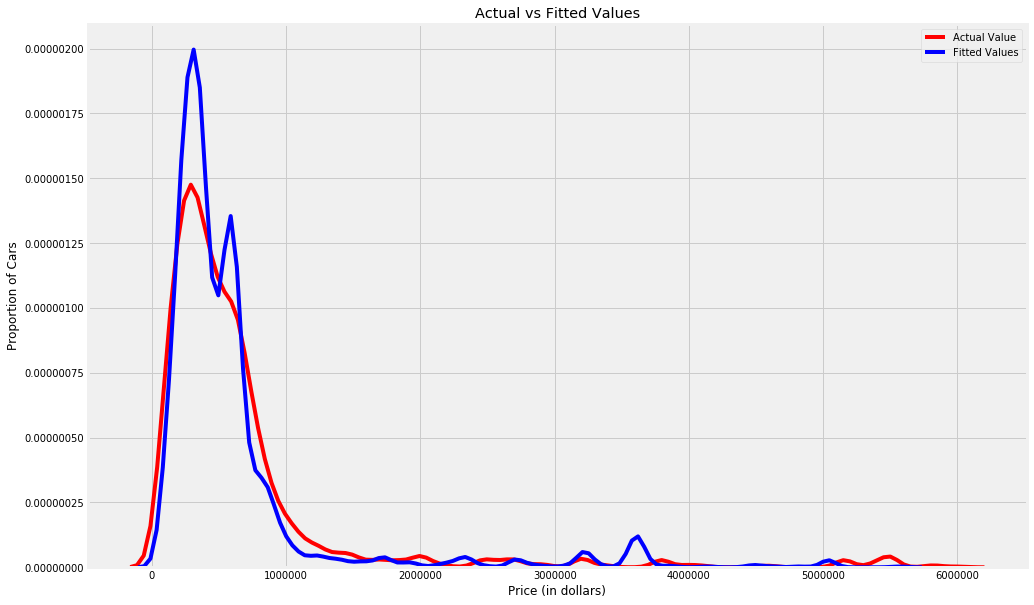

In [177]:
plot_dis(y_test,y_pred_tran_log)

In [178]:
{col:coef for col,coef in zip(X.columns, lr_2.coef_)}

{'total_fuel_consumed': -0.23108354463457756,
 'bxcx_trans_km_driven': 0.08852883103561161,
 'seller_type_Dealer': 991309472084.7306,
 'seller_type_Individual': 991309472084.7032,
 'transmission_Automatic': 2106362354182.3052,
 'transmission_Manual': 2106362354182.2668,
 'Year Category_5 Years or Older': 1819475237675.9653,
 'Year Category_Last 5 Years': 1819475237676.2166,
 'fuel_new_gas': -3348588083870.6235,
 'fuel_new_oil': -3348588083870.619,
 'owner_new_First Owner': 4434212773867.82,
 'owner_new_One plus owner': 4432386719550.859,
 'owner_new_Test Drive Car': 219556598234.33304,
 'seats_Category_5_to_8': -1644286932575.5247,
 'seats_Category_gt_8': -467963756686.5474,
 'seats_Category_lt_5': -1686393087961.611,
 'Engine_Category_1000_to_1250': -493805400605.0634,
 'Engine_Category_1250_to_1500': -426075434023.49335,
 'Engine_Category_1500_to_2000': -318481647326.32336,
 'Engine_Category_gt_2000': -369785523460.92267,
 'Engine_Category_lt_1000': -383580495569.2784,
 'mp_Category_

## lets use grid search cv

In [179]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]
    
}

search = GridSearchCV(pipe, param_grid, n_jobs=1)

pipe.fit(X_train, y_train)

search.fit(X_test, y_test)

best=search.best_estimator_
best


Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [180]:
print(best.score(X_test,y_test))

0.8240168200331714


In [219]:
model_dict['lin_reg_w_grid_srch_cv']=0.8240168200331714
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714}

### using grid search CV with out applying any transformation on the Y variable we are getting the best score of 82.40 percent 
### Cross validation is telling us that the model performs best with degree polynomial of 1

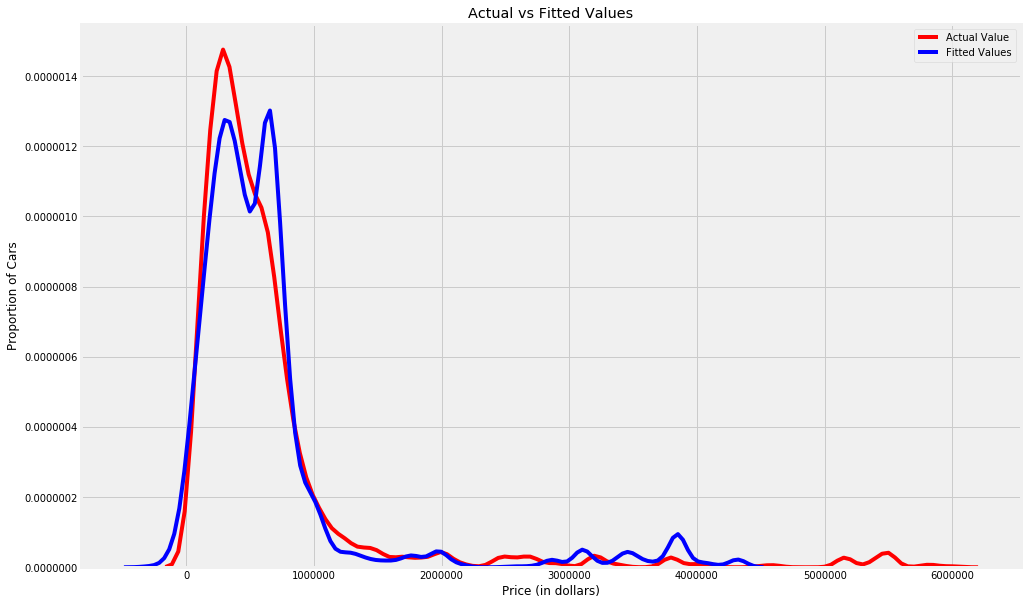

In [181]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

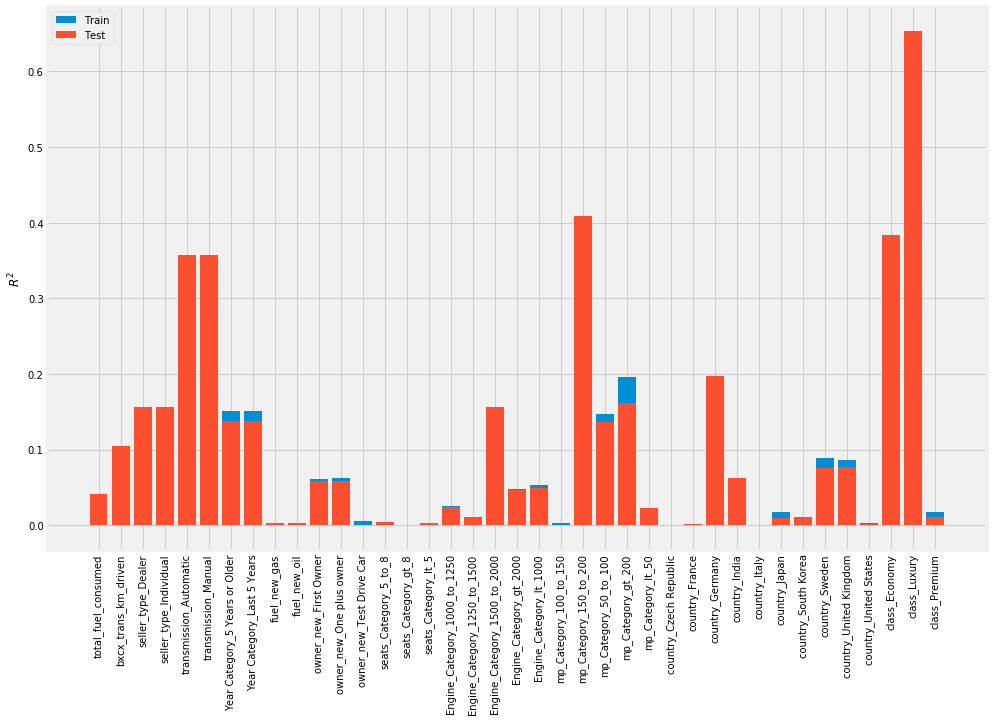

Training R^2 mean value 0.1029702048401936 Testing R^2 mean value 0.10461050732178342 
Training R^2 max value 0.6078248031715958 Testing R^2 max value 0.6532898461212128 


In [182]:
get_R2_features(lr_2)

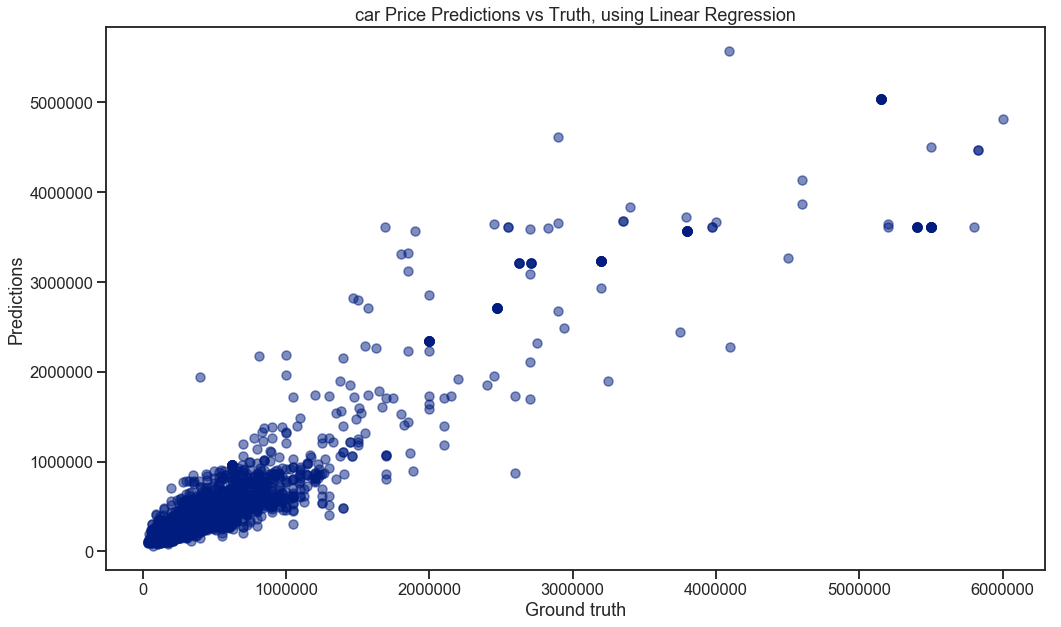

In [183]:
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred_tran_log, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='car Price Predictions vs Truth, using Linear Regression');

## Now let's look at which are the best features in our dataset

In [184]:
# Enter your code and run the cell
pipe_1 = Pipeline([('nn',Normalizer() ),('lr', LinearRegression())])
pipe_1.fit(X_train, y_train)

pipe_1.score(X_train,y_train)
pipe_1.score(X_test,y_test)

pred =pipe_1.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=pred)
rmse = np.sqrt(mse)
rmse

398495.4578616995

In [185]:
features=list(X)
features

['total_fuel_consumed',
 'bxcx_trans_km_driven',
 'seller_type_Dealer',
 'seller_type_Individual',
 'transmission_Automatic',
 'transmission_Manual',
 'Year Category_5 Years or Older',
 'Year Category_Last 5 Years',
 'fuel_new_gas',
 'fuel_new_oil',
 'owner_new_First Owner',
 'owner_new_One plus owner',
 'owner_new_Test Drive Car',
 'seats_Category_5_to_8',
 'seats_Category_gt_8',
 'seats_Category_lt_5',
 'Engine_Category_1000_to_1250',
 'Engine_Category_1250_to_1500',
 'Engine_Category_1500_to_2000',
 'Engine_Category_gt_2000',
 'Engine_Category_lt_1000',
 'mp_Category_100_to_150',
 'mp_Category_150_to_200',
 'mp_Category_50_to_100',
 'mp_Category_gt_200',
 'mp_Category_lt_50',
 'country_Czech Republic',
 'country_France',
 'country_Germany',
 'country_India',
 'country_Italy',
 'country_Japan',
 'country_South Korea',
 'country_Sweden',
 'country_United Kingdom',
 'country_United States',
 'class_Economy',
 'class_Luxury',
 'class_Premium']

In [186]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))

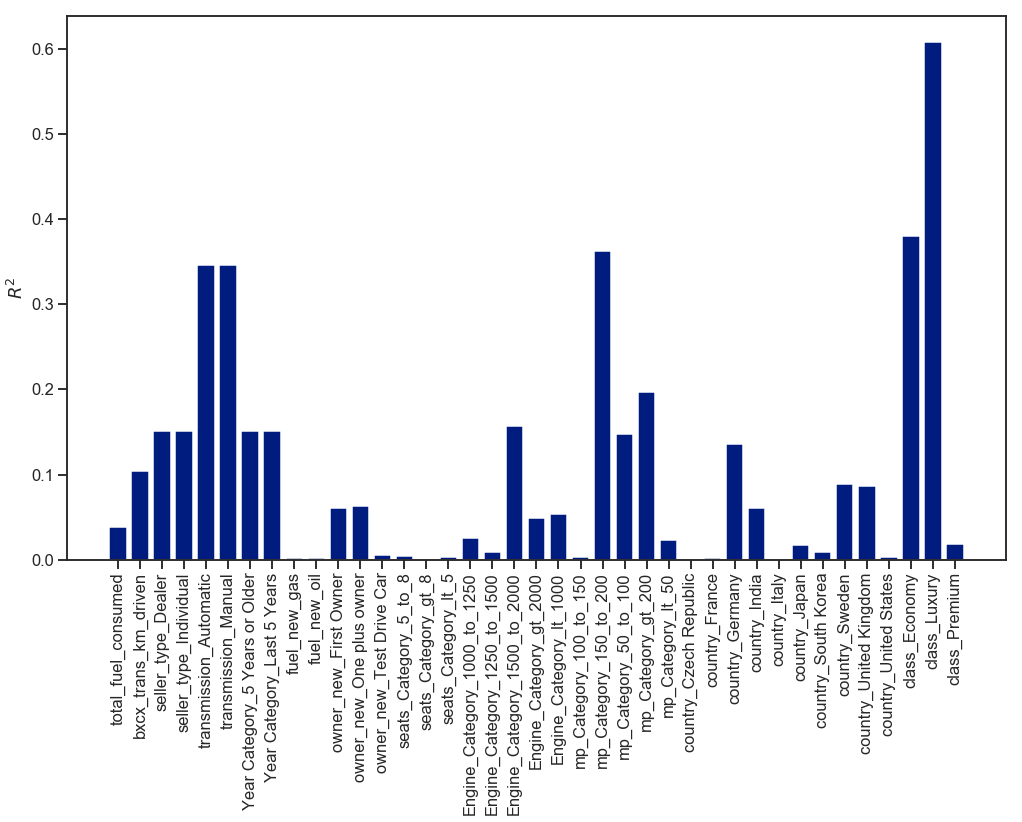

In [187]:
fig = plt.figure(figsize=(15, 10))
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

In [188]:
best=features[np.argmax(R_2)]
best

'class_Luxury'

### Let us check with K fold cross validation

In [189]:
# cars = cars5

In [190]:
y_col = "selling_price"

X = cars.drop(y_col, axis=1)
y = cars[y_col]

In [191]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
## initiating the object
## kf split is a list of tuple with 3 elements each having a train and test index
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')


Train index: [ 0  2  3  4  5  7  8  9 10 11] 5249
Test index: [ 1  6 14 15 16 17 21 22 24 25] 2625

Train index: [ 0  1  2  4  6  7  8 10 11 12] 5249
Test index: [ 3  5  9 18 20 23 30 31 33 37] 2625

Train index: [ 1  3  5  6  9 14 15 16 17 18] 5250
Test index: [ 0  2  4  7  8 10 11 12 13 19] 2624



In [228]:
def plot_coef(X,model,name=None):
    
    fig = plt.figure(figsize=(15,10))
    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))
    

In [193]:
s = StandardScaler()
lr = LinearRegression()


estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

kf

predictions = cross_val_predict(estimator, X, y, cv=kf)

r2_score(y, predictions)

0.8109824294697074

In [220]:
model_dict['lin_reg_w_k_folds_cv']=0.8109824294697074
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714,
 'lin_reg_w_k_folds_cv': 0.8109824294697074}

## Ridge

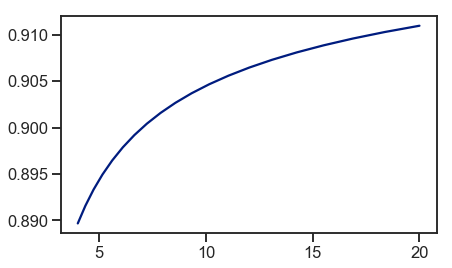

In [694]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)
plt.show()

## Ridge 2

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [204]:
rr = Ridge(alpha=1)
rr
rr.fit(X_train, y_train)
print("R^2 on training  data ",rr.score(X_train, y_train))
print("R^2 on testing data ",rr.score(X_test,y_test))



R^2 on training  data  0.8187558976723215
R^2 on testing data  0.798567672994524


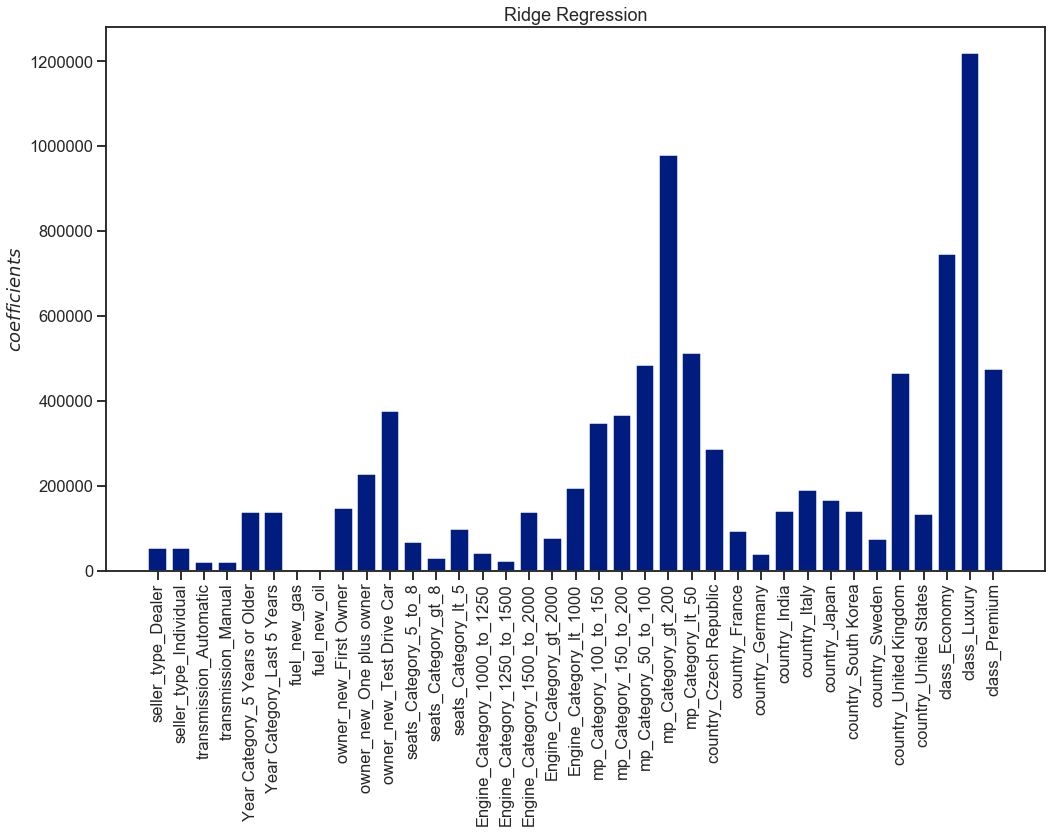

R^2 on training  data  0.8187558976723215
R^2 on testing data  0.798567672994524


In [229]:
# plot_coef(X,lr_2,name="Linear Regression")
plot_coef(X,rr,name="Ridge Regression")

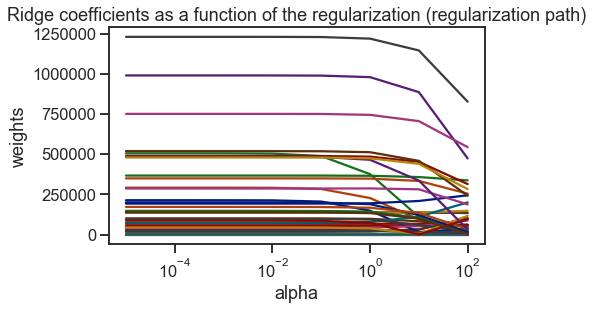

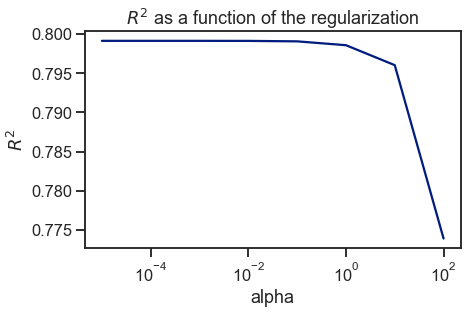

In [202]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show() 

## Ridge with Grid Search CV

In [195]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

pipe.fit(X_train, y_train)

predicted=pipe.predict(X_test)
pipe.score(X_test, y_test)


0.8734925057318907

In [222]:
model_dict['Ridge_lin_reg_w_alpha_1']=0.8734925057318907
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714,
 'lin_reg_w_k_folds_cv': 0.8109824294697074,
 'Ridge_lin_reg_w_grid_cv_alpha_10_pol_degr_2': 0.9131853588339058,
 'Ridge_lin_reg_w_alpha_1': 0.8734925057318907}

In [196]:
param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

pd.DataFrame(search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.016549,0.001541,0.000000,0.000000,0.0001,1,"{'model__alpha': 0.0001, 'polynomial__degree': 1}",0.817469,0.830337,0.793346,0.813717,0.015332,7,0.818273,0.811201,0.829413,0.819629,0.007497
1,0.380622,0.053194,0.066997,0.012548,0.0001,2,"{'model__alpha': 0.0001, 'polynomial__degree': 2}",0.901367,-0.763096,-0.345345,-0.069024,0.707047,13,0.952280,0.948508,0.947373,0.949387,0.002097
2,18.382403,0.451327,1.868510,0.033144,0.0001,3,"{'model__alpha': 0.0001, 'polynomial__degree': 3}",-2.398978,-3.985959,-26.788823,-11.057920,11.142280,22,0.977567,0.971885,0.976909,0.975454,0.002538
3,210.235529,6.841554,20.966351,0.402048,0.0001,4,"{'model__alpha': 0.0001, 'polynomial__degree': 4}",-62.534310,-47.798525,-17.139995,-42.490943,18.908354,24,0.983058,0.978239,0.983386,0.981561,0.002353
4,0.053089,0.013899,0.010324,0.001290,0.001,1,"{'model__alpha': 0.001, 'polynomial__degree': 1}",0.817469,0.830337,0.793346,0.813717,0.015332,6,0.818273,0.811201,0.829413,0.819629,0.007497


In [197]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.9070759972491355
best_params_:  {'model__alpha': 10, 'polynomial__degree': 2}


In [198]:
predict = search.predict(X_test)

predict 

array([895041.12241498, 377587.50124404, 520016.24467629, ...,
       277654.37402522, 515256.94317694,  36151.0539027 ])

In [199]:
best=search.best_estimator_
best

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [200]:
best.score(X_test, y_test)

0.9131853588339058

In [201]:
best.fit(X,y)

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [221]:
model_dict['Ridge_lin_reg_w_grid_cv_alpha_10_pol_degr_2']=0.9131853588339058
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714,
 'lin_reg_w_k_folds_cv': 0.8109824294697074,
 'Ridge_lin_reg_w_grid_cv_alpha_10_pol_degr_2': 0.9131853588339058}

### Lasso

In [680]:
# alphas = np.geomspace(1e-9, 1e0, num=10)
# alphas


# scores = []
# coefs = []
# for alpha in alphas:
#     las = Lasso(alpha=alpha, max_iter=100000)
    
#     estimator = Pipeline([
#         ("scaler", s),
#         ("lasso_regression", las)])

#     predictions = cross_val_predict(estimator, X, y, cv = kf)
    
#     score = r2_score(y, predictions)
    
#     scores.append(score)

In [681]:
# list(zip(alphas,scores))

[(1e-09, 0.8112307331614452),
 (1e-08, 0.8112307331614486),
 (1e-07, 0.8112307331614462),
 (1e-06, 0.8112307331614729),
 (1e-05, 0.8112307331616039),
 (0.0001, 0.811230733163049),
 (0.001, 0.8112307331773246),
 (0.01, 0.811230733320211),
 (0.1, 0.8112307369618745),
 (1.0, 0.811230773449656)]

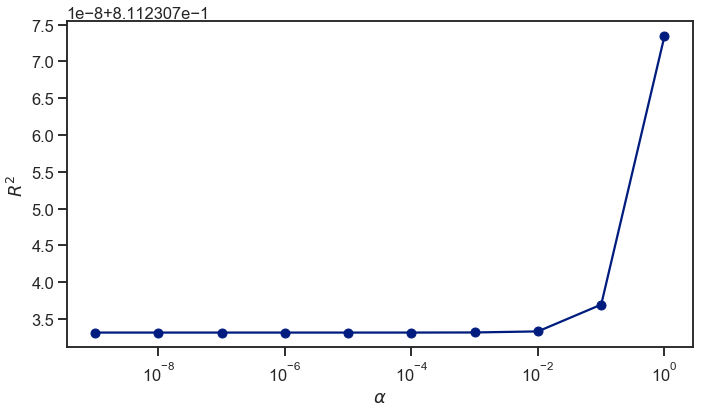

In [682]:
# plt.figure(figsize=(10,6))
# plt.semilogx(alphas, scores, '-o')
# plt.xlabel('$\\alpha$')
# plt.ylabel('$R^2$')
# plt.show();

In [224]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)
la

predicted = la.predict(X_test)
predicted

print("R^2 on training  data ",la.score(X_train, y_train))
print("R^2 on testing data ",la.score(X_test,y_test))


R^2 on training  data  0.8187907368054511
R^2 on testing data  0.7991225036870501


## comparing coefficients between ridge and lasso

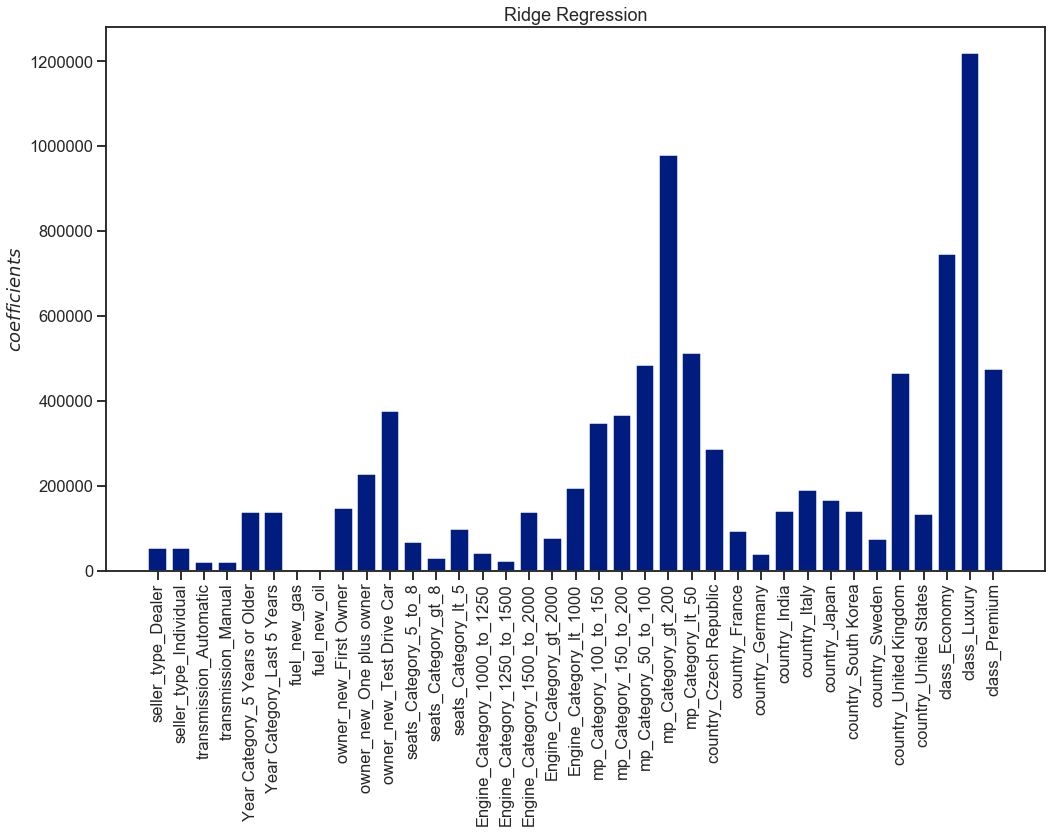

R^2 on training  data  0.8187558976723215
R^2 on testing data  0.798567672994524


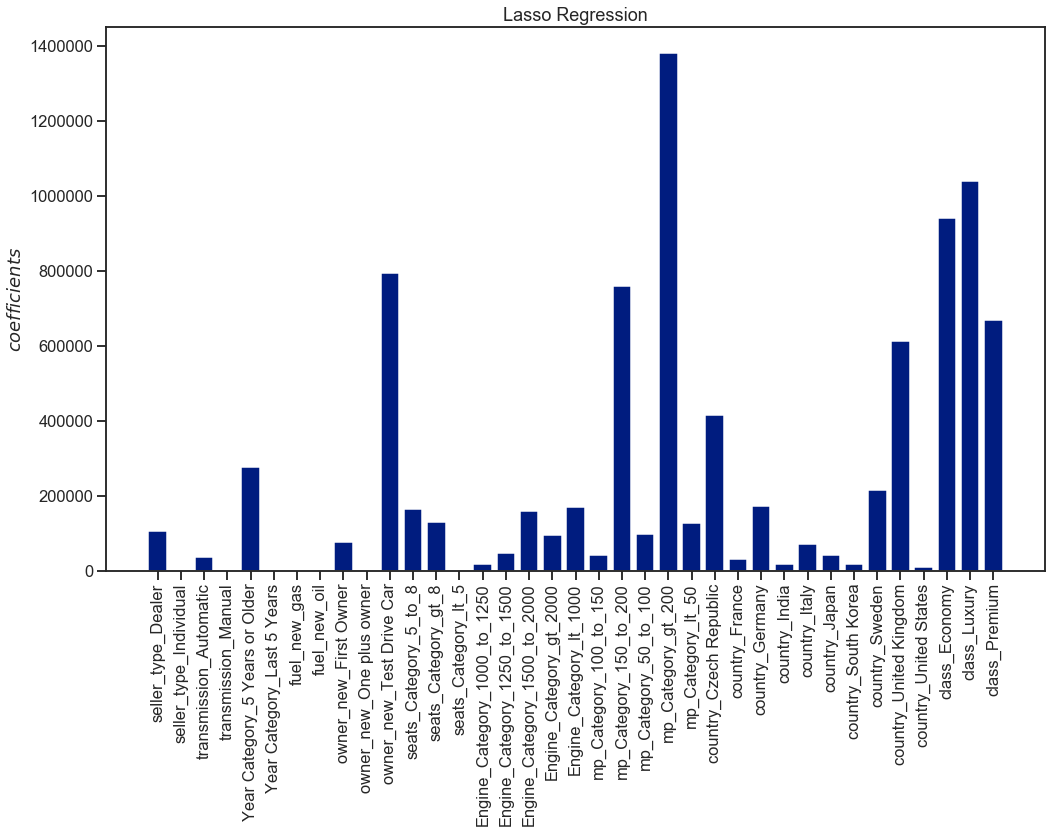

R^2 on training  data  0.8187907368054511
R^2 on testing data  0.7991225036870501


In [230]:
plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,la,name="Lasso Regression")

it can be observed that with Lasso regression lot of the features have been made zero like 
* transmission Manual
* seller type individual
* year category last 5 years
* seats_category_lt_5

## Lasso 2

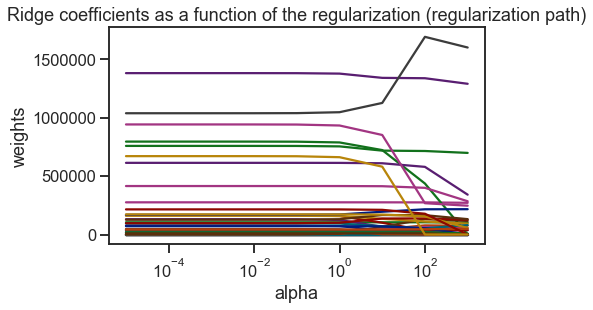

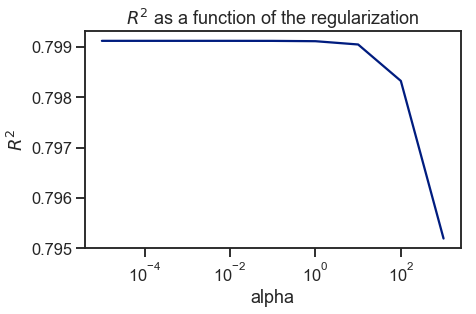

In [256]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

## lASSO Wwith Grid Search CV

In [232]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)

pipe.fit(X_train, y_train)
pipe.predict(X_test)

print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

param_grid = {
    "polynomial__degree": [ 1, 2,3],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

R^2 on training  data  0.8978598950218437
R^2 on testing data  0.8732925267586461


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.2, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'polynomial__degree': [1, 2, 3], 'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [233]:
best=search.best_estimator_
best

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.2, warm_start=False))])

In [234]:
best.score(X_test,y_test)

0.8936291375694358

In [237]:
model_dict['lasso_lin_reg_w_alpha_1_pol_deg_2']=0.8732925267586461
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714,
 'lin_reg_w_k_folds_cv': 0.8109824294697074,
 'Ridge_lin_reg_w_grid_cv_alpha_10_pol_degr_2': 0.9131853588339058,
 'Ridge_lin_reg_w_alpha_1': 0.8734925057318907,
 'lasso_lin_reg_w_alpha_1_pol_deg_2': 0.8732925267586461}

In [254]:
model_dict['lasso_lin_reg_w_grid_cv_appha_10']=0.8936291375694358
model_dict

{'lin_reg': 0.7658356348846815,
 'lin_reg_w_log_tran': 0.8274387948468658,
 'lin_reg_w_box_cox_tran': 0.8274387948468658,
 'lin_reg_w_grid_srch_cv': 0.8240168200331714,
 'lin_reg_w_k_folds_cv': 0.8109824294697074,
 'Ridge_lin_reg_w_grid_cv_alpha_10_pol_degr_2': 0.9131853588339058,
 'Ridge_lin_reg_w_alpha_1': 0.8734925057318907,
 'lasso_lin_reg_w_alpha_1_pol_deg_2': 0.8732925267586461,
 'lasso_lin_reg_w_grid_cv_appha_': 0.8936291375694358,
 'lasso_lin_reg_w_grid_cv_appha_10': 0.8936291375694358}

# 4. Insights and key findings


### With basic Linear Regression model is over fitting, but we can see that without using the polynomial term we are getting an R2 score of 

* 74 percent, without applying any transformation on the Y variable
* 82 percent, on applying log or box cox transformation on the Y variable
* Using grid search cv, with out applying any transformation on the Y variable we are getting the best score of 82.40 percent, Cross validation is telling us that the model performs best with degree polynomial of 1


Some of the top features from the Model fit are
* class_luxury
* class_economy
* mp_category_150_250
* transmission automatic and Manual

using *K folds cross validation* the best score we are getting is 81.09 percent without any transformation on the Y variable

With *Ridge regression* and grid sear cv we are getting the highest score of 90.13% with a polynomial degree of 2 and alpha of 10

it can be observed that with Lasso regression lot of the features have been made zero like 
* transmission Manual
* seller type individual
* year category last 5 years
* seats_category_lt_5

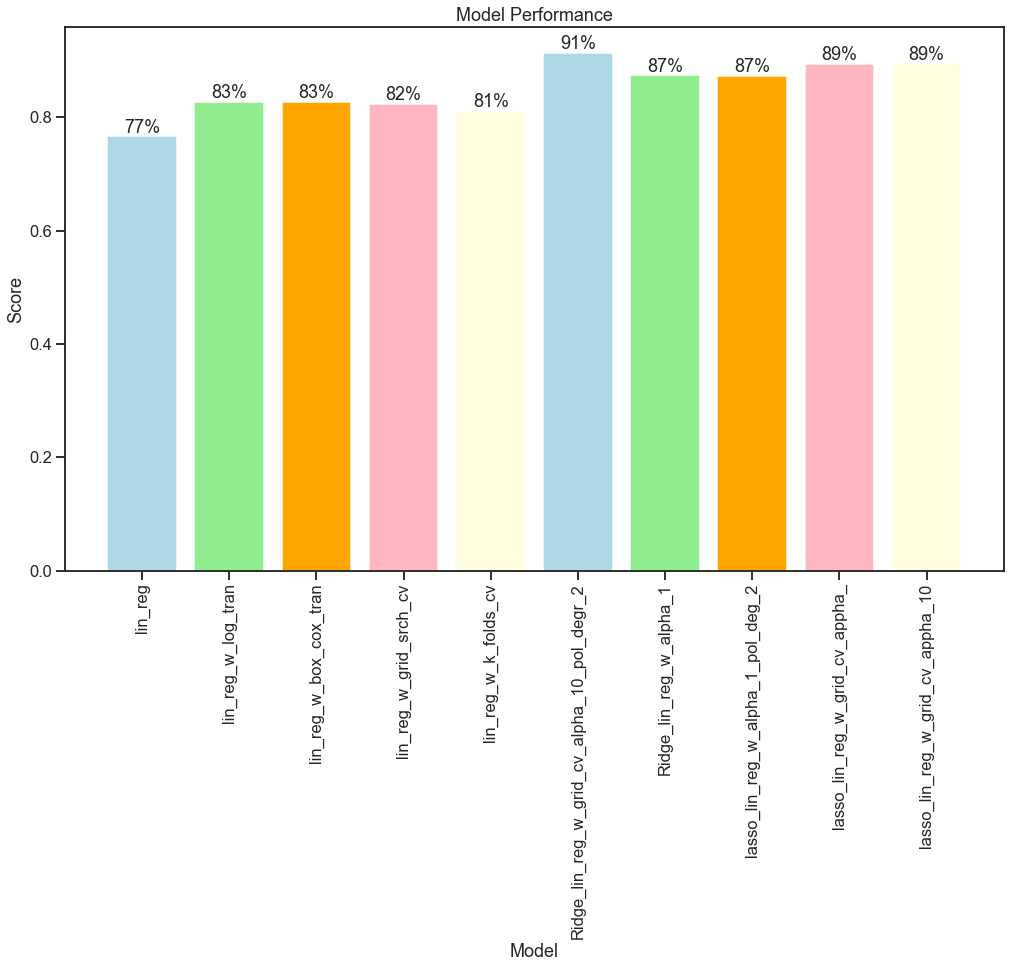

In [255]:
# Get the model names and scores
model_names = list(model_dict.keys())
scores = list(model_dict.values())

# Increase figure size
plt.figure(figsize=(15, 10))

# Define transient colors
colors = ['lightblue', 'lightgreen', 'orange', 'lightpink', 'lightyellow']

# Plot the scores with transient colors
bars = plt.bar(model_names, scores, color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')

# Add percentages on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0%}', ha='center', va='bottom')

# Tilt the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

from the overall model performance it can be observed that ridge regression with alpha 10 and polynomial degree 2 did the best job at 91 pecent on the validation set, followed by lasso regression with ploynomial degree 2.

Overall our objective of predicting the selling price of the different cars is doing well with a validation set r2 score of 91 percent

# 5. Next Steps


* It can be observed from the assumptions section of the linear regression model part that the predictor variable is not completely linear with the Feature set
* Along with it in our data set we have a lot of categorical variables, and we are aware linear regression does not work very well with categorical variables
* My takeaway would be that tree based models might work better with this data set in predicting the selling price
* Along with it I would try to see if including some more continuous variables for the data might be worth taking into consideration, for example metrics like Engine Size, Best speed in o to 10 seconds, Highway best mileage, City Best Mileage, if there was a previous owner what was the price then etc. to see if that improves the model performance

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
